# Capítulo 6: Árbol de Decisión

## <span style="color:green">1. Clasificación</span>

In [21]:
#Importar los bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [3]:
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
COMEDIANTES = "Capitulo_6/Comediantes.csv"
#Declara la función para extraer datos
def extraer_datos(root,database):
    csv_path=root+ database
    return pd.read_csv(csv_path)

In [4]:
#Checa los datos y extrae el dataframe 
#Chica, mucho ojo con las variables. Escribirlas en mayúsculas como arriba. 
df=extraer_datos(DOWNLOAD_ROOT,COMEDIANTES)
#Es un dataframe chiquito pero útil :) 
df
#Recuerda que Go es el veredicto de si será o no será comediante

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [5]:
#Utiliza el label_encoder para asignar un valor numérico a Nacionalidad y a Go
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Nationality","Go"]

for l in variables:
    label_encoder(l)
#verifica que las variables "Nacionality" y "Go" se cambiaron a valores numéricos 
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [10]:
#Separa en dos partes el dataframe 
y = df["Go"]
x = df.drop("Go",axis=1)

In [11]:
#verifica que se haya hecho la separación 
x
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [12]:
#Carnita del asunto:Haz el clasificador de DecisionTree
    #Importa la función
from sklearn.tree import DecisionTreeClassifier
    #Haz el objeto 
arbol = DecisionTreeClassifier()
    #Haz el ajuste
arbol.fit(x,y)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

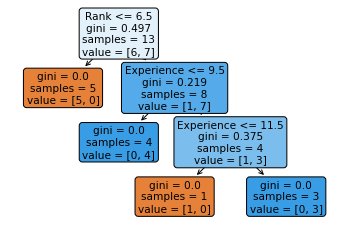

In [13]:
#Gráfica el árbol de decisión 
from sklearn import tree
tree.plot_tree(arbol,feature_names=x.columns,rounded=True,filled=True)

***

## <span style="color:green">2. Probabilidades</span>

También permite estimar probabilidades 🥳. Lo veremos con un ejemplo:

In [14]:
#Selecciona una persona aleatoria para estimar su probabilidad y juega con las variables 
arbol.predict_proba([[40,6,7,1]])

/Users/karenrg/my_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

👀 -El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

## <span style="color:green">3. Regresión</span>

Los árboles de decisión 🌳 tambien pueden hacer regresiones lineales.

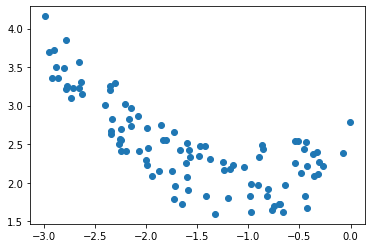

In [22]:
#Genera 100 número aleatorios y añade un poco de aleatoriedad 
m = 100
x = 3 * np.random.rand(m,1) - 3
y = 2 + x + 0.5*x**2 + np.random.rand(m,1)
#np.c_[([x])]
plt.scatter(x,y)

In [23]:
#Crea un  árbol de decisión con un hiperparametro de 2
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=2)
arbol.fit(x,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= -2.285\nsquared_error = 0.318\nsamples = 100\nvalue = 2.495'),
 Text(0.25, 0.5, 'X[0] <= -2.784\nsquared_error = 0.12\nsamples = 23\nvalue = 3.308'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.065\nsamples = 8\nvalue = 3.642'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.058\nsamples = 15\nvalue = 3.13'),
 Text(0.75, 0.5, 'X[0] <= -1.776\nsquared_error = 0.121\nsamples = 77\nvalue = 2.253'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.062\nsamples = 21\nvalue = 2.56'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.094\nsamples = 56\nvalue = 2.137')]

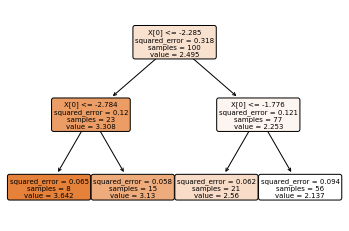

In [24]:
#Dale formato a tu arbolito bebé 🌳
tree.plot_tree(arbol,rounded=True,filled=True)

Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: **mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza. **nsamples=** Cantidad de muestras por nodo. **nvalue=** Valor

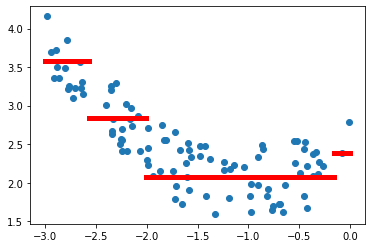

In [25]:
#Hacer gráfica toda complicada :(
x1 = np.linspace(-3,-2.568)
y1 = np.linspace(3.5818,3.5818)
x2 = np.linspace(-2.569,-2.008)
y2 = np.linspace(2.834,2.834)
x3 = np.linspace(-2.009,-0.151)
y3 = np.linspace(2.075,2.075)
x4 = np.linspace(-0.152,0)
y4 = np.linspace(2.392,2.392)
plt.scatter(x,y)
plt.plot(x1,y1,"r-",linewidth=5)
plt.plot(x2,y2,"r-",linewidth=5)
plt.plot(x3,y3,"r-",linewidth=5)
plt.plot(x4,y4,"r-",linewidth=5)

Los nodos se ven representados por cada linea rojo

[Text(0.5, 0.875, 'X[0] <= -2.285\nsquared_error = 0.318\nsamples = 100\nvalue = 2.495'),
 Text(0.25, 0.625, 'X[0] <= -2.784\nsquared_error = 0.12\nsamples = 23\nvalue = 3.308'),
 Text(0.125, 0.375, 'X[0] <= -2.966\nsquared_error = 0.065\nsamples = 8\nvalue = 3.642'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 4.159'),
 Text(0.1875, 0.125, 'squared_error = 0.031\nsamples = 7\nvalue = 3.569'),
 Text(0.375, 0.375, 'X[0] <= -2.351\nsquared_error = 0.058\nsamples = 15\nvalue = 3.13'),
 Text(0.3125, 0.125, 'squared_error = 0.018\nsamples = 11\nvalue = 3.229'),
 Text(0.4375, 0.125, 'squared_error = 0.069\nsamples = 4\nvalue = 2.858'),
 Text(0.75, 0.625, 'X[0] <= -1.776\nsquared_error = 0.121\nsamples = 77\nvalue = 2.253'),
 Text(0.625, 0.375, 'X[0] <= -2.074\nsquared_error = 0.062\nsamples = 21\nvalue = 2.56'),
 Text(0.5625, 0.125, 'squared_error = 0.042\nsamples = 11\nvalue = 2.686'),
 Text(0.6875, 0.125, 'squared_error = 0.047\nsamples = 10\nvalue = 2.42'),
 Text(0.875

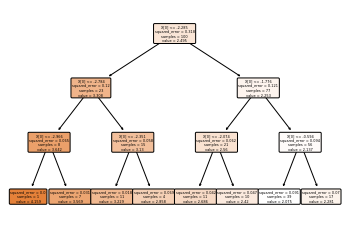

In [28]:
#Arreglar el sobreajuste poniendo una profundidad máxima mayor a la anterior. Ej: 3. 
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=3)
arbol.fit(x,y)
#Gráficalo 
tree.plot_tree(arbol,rounded=True,filled=True)
#tree.plot_tree(arbol,rounded=True,filled=True,fontsize=15)Para hacer más grande la letra ajustar fontsize

In [30]:
#Haz un árbol de decisiones sin restricciones
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor()
arbol.fit(x,y)

DecisionTreeRegressor()

[Text(0.3601474223163842, 0.9736842105263158, 'X[0] <= -2.221\nsquared_error = 0.348\nsamples = 100\nvalue = 2.523'),
 Text(0.11864406779661017, 0.9210526315789473, 'X[0] <= -2.851\nsquared_error = 0.182\nsamples = 27\nvalue = 1.756'),
 Text(0.04519774011299435, 0.868421052631579, 'X[0] <= -2.974\nsquared_error = 0.108\nsamples = 5\nvalue = 1.076'),
 Text(0.022598870056497175, 0.8157894736842105, 'X[0] <= -2.988\nsquared_error = 0.021\nsamples = 2\nvalue = 0.864'),
 Text(0.011299435028248588, 0.7631578947368421, 'squared_error = 0.0\nsamples = 1\nvalue = 1.009'),
 Text(0.03389830508474576, 0.7631578947368421, 'squared_error = 0.0\nsamples = 1\nvalue = 0.719'),
 Text(0.06779661016949153, 0.8157894736842105, 'X[0] <= -2.88\nsquared_error = 0.116\nsamples = 3\nvalue = 1.218'),
 Text(0.05649717514124294, 0.7631578947368421, 'X[0] <= -2.921\nsquared_error = 0.074\nsamples = 2\nvalue = 1.4'),
 Text(0.04519774011299435, 0.7105263157894737, 'squared_error = 0.0\nsamples = 1\nvalue = 1.127'),
 

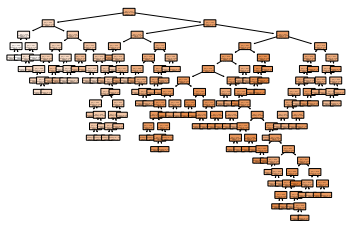

In [31]:
#Gráficalo y asómbrate 
tree.plot_tree(arbol,rounded=True,filled=True)